<a href="https://colab.research.google.com/github/AlexBB999/THINK/blob/master/DataCleaning_14_5_Data_Exploration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the SQL ALchemy engine
from sqlalchemy import create_engine

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats
import statsmodels.stats.proportion as proportion
from statsmodels.stats.weightstats import CompareMeans
from scipy.stats.mstats import winsorize
import seaborn as sns

In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [0]:
# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

In [0]:
ed0 = pd.read_sql_query('select * FROM useducation',con=engine)
#educate= engine.execute('SELECT * FROM useducation' )
engine.dispose()

In [0]:
# use fetchall() to get a list of rows from the results.
#ed = educate.fetchall()

In [0]:
ed=ed0.copy()

In [0]:
ed1=ed0.copy()

In [112]:
type(ed1)

method

In [0]:
ed2=ed0.copy()

In [117]:
type(ed2)

pandas.core.frame.DataFrame

In [8]:
ed2.head(3)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895


In [0]:
ed2.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492,1492,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,1.280000e+03,1319.000000,1360.000000,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
unique,1487,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,9.027693e+05,17601.614102,63746.761029,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,NaN,NaN,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,1.327562e+06,30016.166447,80205.138143,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,NaN,NaN,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,NaN,NaN,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,1.815645e+05,2021.000000,11745.000000,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,NaN,NaN,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,5.102595e+05,8106.000000,41597.500000,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,NaN,NaN,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,9.668515e+05,22295.000000,73865.250000,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121


In [9]:
ed2.describe(include=['O'])

,PRIMARY_KEY,STATE
count,1492,1492
unique,1487,80
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA
freq,3,29


In [0]:
#for column_name in ed.columns:
    #print("Unique values in column {} are: {}".format(column_name, ed[column_name].unique()))

GET A SENSE OF THE MAGNITUDE OF THE MSSING VALUES -- percentage missing for each column

In [0]:
#ed2.isnull().sum()*100/ed.isnull().count()

In [0]:
#ed2.isnull().sum()

In [0]:
#ed2.drop(columns=['AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE','AVG_READING_8_SCORE'], inplace=True)

AVG MATH AND READING GRADES 4 AND 8 ARE MISSING ALMOST 2/3 OF ENTRIES

In [0]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
"STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
"INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
"OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G","GRADES_KG_G", 
"GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", "GRADES_9_12_G", "GRADES_ALL_G"]

**working through part of posted solution to understand what they did -- very slick**

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

In [0]:
states = ed2["STATE"].unique()

for state in states:
    ed2.loc[ed2["STATE"] == state, fill_list] = ed2.loc[ed2["STATE"] == state, fill_list].interpolate()

In [12]:
ed2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.281000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.281000e+03,1.331000e+03,1443.000000,1485.000000,1485.000000,1485.000000,1485.000000,1.485000e+03,1.485000e+03,1.443000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.166431e+05,9.246804e+06,7.772786e+05,4.289618e+06,4.179907e+06,9.342417e+06,4.844756e+06,2.725092e+06,4.348513e+05,9.086405e+05,17941.337838,63355.545791,64216.228283,63883.304040,54378.534680,5.161999e+05,2.463631e+05,8.016962e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.067856e+06,1.200350e+07,1.155857e+06,5.674137e+06,5.608607e+06,1.220752e+07,6.433283e+06,3.420267e+06,5.426507e+05,1.330097e+06,30147.098502,80564.817911,80504.894652,79037.699179,68781.870366,6.442378e+05,3.092694e+05,9.820252e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04,0.000000,544.000000,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.200842e+06,1.910190e+05,1.172219e+06,7.254095e+05,2.176975e+06,1.177296e+06,6.447875e+05,1.043740e+05,1.840940e+05,2021.000000,11502.000000,13311.000000,13018.000000,10741.000000,1.071090e+05,5.008300e+04,1.727145e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.515540e+05,5.169926e+06,4.100510e+05,2.578149e+06,2.089445e+06,5.298267e+06,2.688963e+06,1.545738e+06,2.741430e+05,5.161160e+05,8282.000000,41224.000000,42784.000000,43018.000000,36469.000000,3.425700e+05,1.622720e+05,5.449220e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.109900e+07,8.440360e+05,5.185174e+06,4.808003e+06,1.087317e+07,5.641158e+06,3.307162e+06,5.261780e+05,9.739965e+05,23087.500000,73831.000000,75322.000000,76376.000000,67716.000000,6.102640e+05,2.913940e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,250911.000000,530531.000000,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


In [0]:
#for col in fill_list:
 # ed2[col]=ed2[col].interpolate()

In [0]:
ed2.dropna(inplace=True)


In [15]:
ed2.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466,466,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
unique,465,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,1.038843e+06,22874.634120,72083.415236,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,NaN,NaN,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,1.482245e+06,34605.068547,87006.137056,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,NaN,NaN,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,1.545200e+04,91.000000,4528.000000,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,2.443388e+05,3753.000000,20988.000000,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,NaN,NaN,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,6.059525e+05,13068.500000,51156.500000,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,NaN,NaN,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,1.046753e+06,28808.500000,79618.000000,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884


In [16]:
ed2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466 entries, 209 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     466 non-null object
STATE                           466 non-null object
YEAR                            466 non-null int64
ENROLL                          466 non-null float64
TOTAL_REVENUE                   466 non-null float64
FEDERAL_REVENUE                 466 non-null float64
STATE_REVENUE                   466 non-null float64
LOCAL_REVENUE                   466 non-null float64
TOTAL_EXPENDITURE               466 non-null float64
INSTRUCTION_EXPENDITURE         466 non-null float64
SUPPORT_SERVICES_EXPENDITURE    466 non-null float64
OTHER_EXPENDITURE               466 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      466 non-null float64
GRADES_PK_G                     466 non-null float64
GRADES_KG_G                     466 non-null float64
GRADES_4_G                      466 non-null float64
GRADES_8_G                      466 non-null flo

In [18]:
ed2.isnull().sum()

PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          0
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     0
GRADES_KG_G                     0
GRADES_4_G                      0
GRADES_8_G                      0
GRADES_12_G                     0
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    0
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
dtype: int64

In [19]:
len(fill_list)

18

Univariate visualization

**so do i need to check 18 column for outliers or just winsorize the whole thing??????**



///////////////////////////////////////////////////////////////////////////////////////////////////////////


In [0]:
#plt.subplot(3, 3, 9)
#plt.hist(np.log(youtube_df["Video views"]))
#plt.title("histogram of video views (log transformed)")


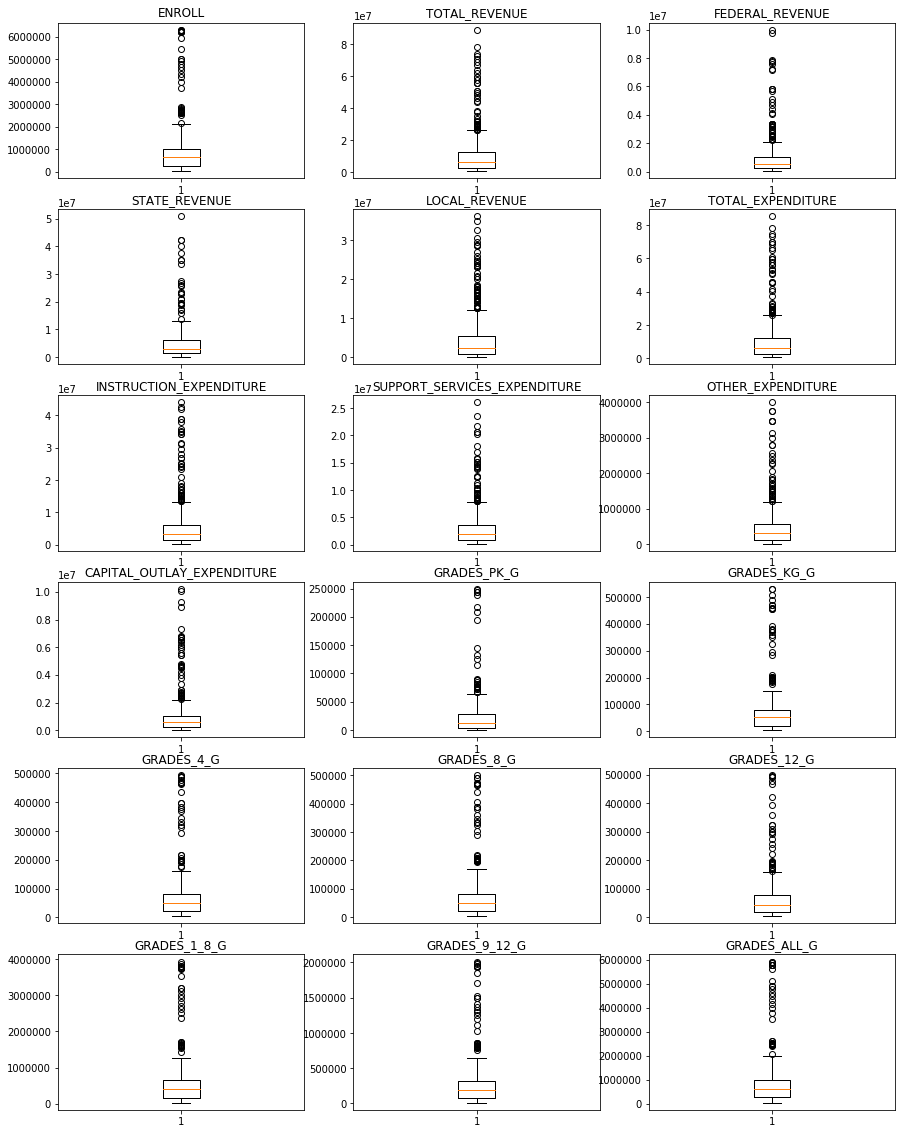

In [20]:
plt.figure(figsize=(15,20))
i=0
while i<17:
  for col in fill_list:
    i=i+1
    plt.subplot(6,3,i)
    plt.boxplot(ed2[col])
    plt.title(col)
plt.show()

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

**WINSORIZE ALL NUMERIC COLUMNS**




In [0]:
for col in fill_list:
  ed2[col] = winsorize(ed2[col], (0.0, 0.12))

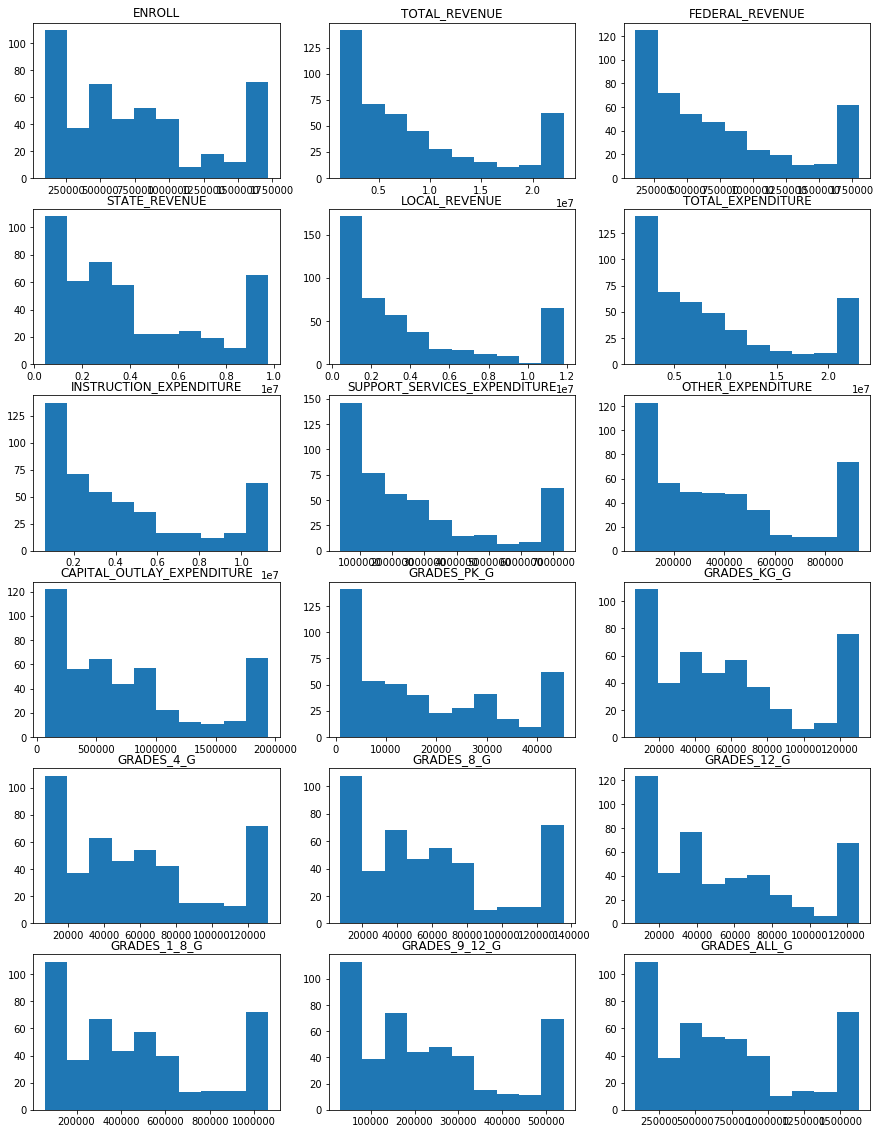

In [0]:
plt.figure(figsize=(15,20))
i=0
while i<18:
  for col in fill_list:
    i=i+1
    plt.subplot(6,3,i)
    #plt.boxplot(ed2[col])
    plt.hist(ed2[col])
    plt.title(col)
plt.show()

for col in fill_list:
  plt.boxplot(ed2[col],whis=1.5)
  plt.title( col)
  plt.show()

In [22]:
ed2.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466,466,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000
unique,465,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2008.577253,7.486501e+05,8.650241e+06,7.213195e+05,4.007082e+06,3.908149e+06,8.658840e+06,4.395837e+06,2.657020e+06,391393.156652,7.626774e+05,17453.574034,57155.505365,57568.637339,58383.187768,52606.067597,4.641965e+05,229745.225322,7.096912e+05,236.909728,279.802668,219.508638,263.789943
std,NaN,NaN,5.779779,5.389859e+05,7.213080e+06,5.543482e+05,3.057173e+06,3.795198e+06,7.199244e+06,3.578092e+06,2.281080e+06,298921.971174,6.123743e+05,14942.757180,41066.731064,41450.499912,42595.860056,39302.208999,3.354470e+05,169817.496434,5.130425e+05,8.695903,9.381511,7.426546,6.875627
min,NaN,NaN,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,23107.000000,1.545200e+04,91.000000,4528.000000,3423.000000,2860.000000,2188.000000,2.676200e+04,9970.000000,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,129651.500000,2.443388e+05,3753.000000,20988.000000,20489.750000,20880.250000,18527.750000,1.666395e+05,81944.000000,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,NaN,NaN,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,327184.500000,6.059525e+05,13068.500000,51156.500000,50918.000000,50114.500000,41543.000000,4.067475e+05,186890.000000,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,NaN,NaN,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,560938.500000,1.046753e+06,28808.500000,79618.000000,79929.500000,80949.750000,75641.250000,6.424952e+05,323491.500000,9.758625e+05,242.602566,286.197041,224.531280,268.307884


////////////////////////////////////////////////////////////////////////////////////////////////////////

**USE LOG TRANSFORM**



In [0]:
ed2=ed0.copy()

In [0]:
states = ed2["STATE"].unique()

for state in states:
    ed2.loc[ed2["STATE"] == state, fill_list] = ed2.loc[ed2["STATE"] == state, fill_list].interpolate()

In [0]:
ed2.dropna(inplace=True)


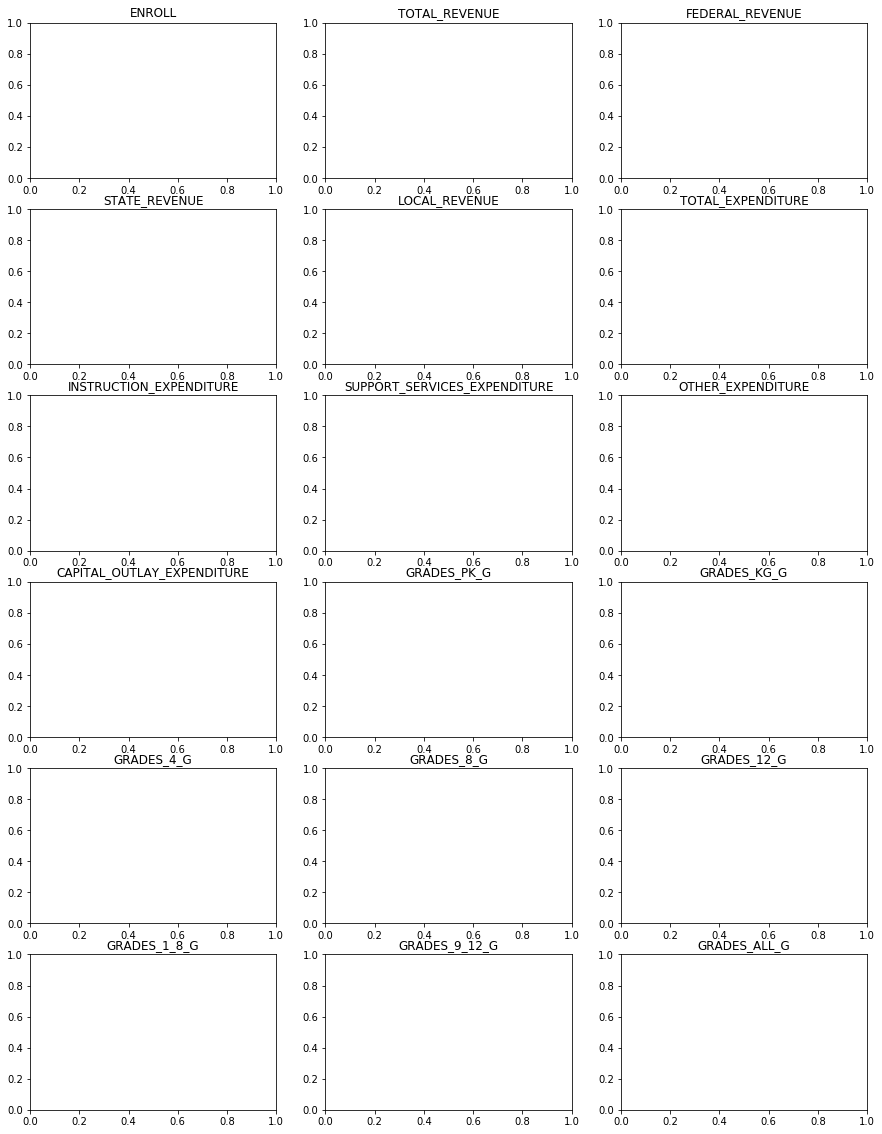

In [28]:
plt.figure(figsize=(15,20))
i=0
while i<18:
  for col in fill_list:
    i=i+1
    plt.subplot(6,3,i)
    #plt.boxplot(np.log(ed2[col]))
    #plt.hist(np.log(ed2[col]))
    plt.title(col)
plt.show()

1 - Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [29]:
ed2.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000,466.000000,4.660000e+02,466.000000,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,7.486501e+05,8.650241e+06,7.213195e+05,4.007082e+06,3.908149e+06,8.658840e+06,4.395837e+06,2.657020e+06,391393.156652,7.626774e+05,17453.574034,57155.505365,57568.637339,58383.187768,52606.067597,4.641965e+05,229745.225322,7.096912e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,5.389859e+05,7.213080e+06,5.543482e+05,3.057173e+06,3.795198e+06,7.199244e+06,3.578092e+06,2.281080e+06,298921.971174,6.123743e+05,14942.757180,41066.731064,41450.499912,42595.860056,39302.208999,3.354470e+05,169817.496434,5.130425e+05,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,23107.000000,1.545200e+04,91.000000,4528.000000,3423.000000,2860.000000,2188.000000,2.676200e+04,9970.000000,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,129651.500000,2.443388e+05,3753.000000,20988.000000,20489.750000,20880.250000,18527.750000,1.666395e+05,81944.000000,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,327184.500000,6.059525e+05,13068.500000,51156.500000,50918.000000,50114.500000,41543.000000,4.067475e+05,186890.000000,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,560938.500000,1.046753e+06,28808.500000,79618.000000,79929.500000,80949.750000,75641.250000,6.424952e+05,323491.500000,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,1.721351e+06,2.302633e+07,1.805878e+06,9.764558e+06,1.182479e+07,2.301040e+07,1.128472e+07,7.333616e+06,932950.000000,1.942608e+06,45353.000000,130527.000000,131236.000000,135598.000000,126380.000000,1.063310e+06,541403.000000,1.628449e+06,253.420961,300.568235,236.773867,280.499130


//////////////////////////////////////////////////////////////////////////////////////////////


2 - Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. 

How do these 2 variables evolve during the years? 

Try to explain the peaks and troughs with some state-wise news and information around those dates.

CREATE CALIFORNIA ONLY SUBSET

In [0]:
ed2_cal=ed2[ed2['STATE']=='CALIFORNIA']

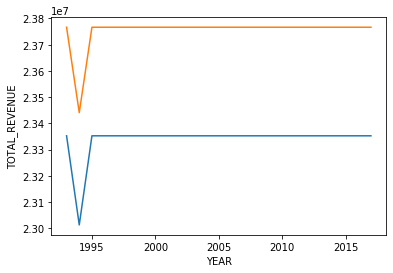

In [0]:
sns.lineplot(ed2_cal['YEAR'],ed2_cal['TOTAL_EXPENDITURE'])
sns.lineplot(ed2_cal['YEAR'],ed2_cal['TOTAL_REVENUE'],dashes=True) 
plt.show()

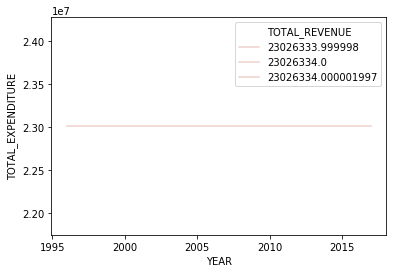

In [31]:
ax = sns.lineplot(x="YEAR", y='TOTAL_EXPENDITURE',
                  hue="TOTAL_REVENUE",data=ed2_cal)

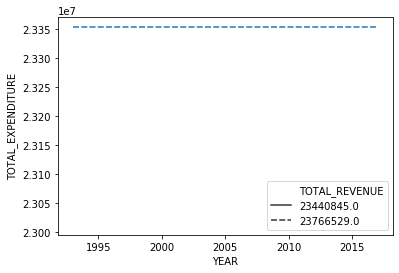

In [0]:
ax = sns.lineplot(x="YEAR", y='TOTAL_EXPENDITURE',
        style='TOTAL_REVENUE',data=ed2_cal)

In [0]:
ax = sns.lineplot(x="timepoint", y="signal",
                  hue="event", style="event", data=fmri)

NameError: ignored

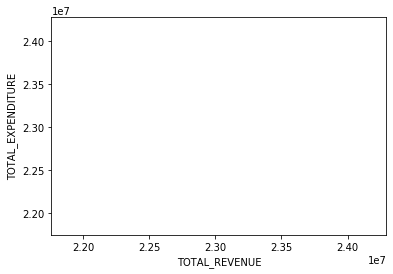

In [32]:
sns.lineplot(x='TOTAL_REVENUE', y='TOTAL_EXPENDITURE', data=ed2_cal)

3- **In your chosen state, which of the lessons are the students more successful, math or reading?**


---



In [33]:
ed2_cal['AVG_MATH_4_SCORE'].mean()

227.385690930793

In [34]:
ed2_cal['AVG_MATH_8_SCORE'].mean()

270.201543317025

In [35]:
ed2['AVG_READING_4_SCORE'].mean()

219.5086378831396

In [36]:
ed2['AVG_READING_8_SCORE'].mean()

263.78994305217884

MATH WAS MORE SUCCESSFUL

4 -**What are the distributions of the math and reading scores in the sample?**

In [37]:
ed2['AVG_READING_4_SCORE'].describe()

count    466.000000
mean     219.508638
std        7.426546
min      181.626990
25%      215.338956
50%      221.130461
75%      224.531280
max      236.773867
Name: AVG_READING_4_SCORE, dtype: float64

(array([  1.,   3.,   0.,   4.,  25.,  45.,  99., 174.,  99.,  16.]),
 array([5.20195508, 5.22847013, 5.25498517, 5.28150022, 5.30801526,
        5.33453031, 5.36104535, 5.3875604 , 5.41407545, 5.44059049,
        5.46710554]),
 <a list of 10 Patch objects>)

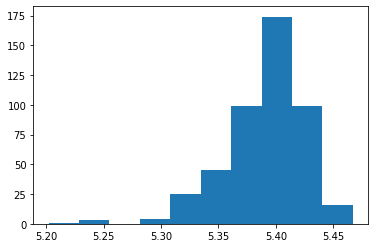

In [43]:
plt.hist(np.log(ed2['AVG_READING_4_SCORE']))

(array([  1.,   3.,   1.,   6.,  40.,  52., 110., 176.,  64.,  13.]),
 array([181.62699047, 187.14167808, 192.65636569, 198.1710533 ,
        203.68574091, 209.20042853, 214.71511614, 220.22980375,
        225.74449136, 231.25917897, 236.77386658]),
 <a list of 10 Patch objects>)

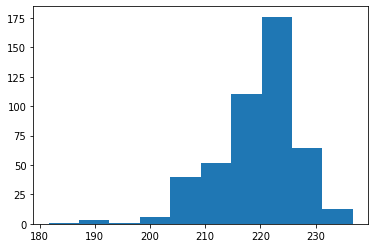

In [44]:
plt.hist(ed2['AVG_READING_4_SCORE'])

In [38]:
ed2['AVG_READING_8_SCORE'].describe()

count    466.000000
mean     263.789943
std        6.875627
min      236.379102
25%      259.661771
50%      265.217081
75%      268.307884
max      280.499130
Name: AVG_READING_8_SCORE, dtype: float64

In [39]:
ed2['AVG_MATH_4_SCORE'].describe()

count    466.000000
mean     236.909728
std        8.695903
min      187.134670
25%      232.760641
50%      238.394124
75%      242.602566
max      253.420961
Name: AVG_MATH_4_SCORE, dtype: float64

In [40]:
ed2['AVG_MATH_4_SCORE'].describe()

count    466.000000
mean     236.909728
std        8.695903
min      187.134670
25%      232.760641
50%      238.394124
75%      242.602566
max      253.420961
Name: AVG_MATH_4_SCORE, dtype: float64

5- **Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.**

In [0]:
ed['AVG_MATH_4_SCORE']=ed['AVG_MATH_4_SCORE'].interpolate()

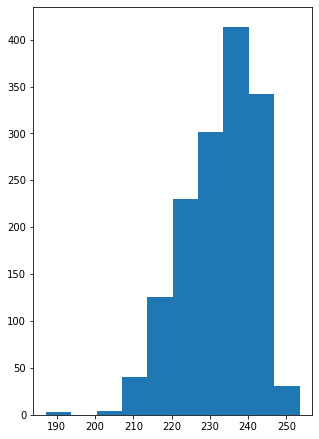

In [86]:
plt.figure(figsize=(5,7.5))
plt.hist(ed['AVG_MATH_4_SCORE'])
#plt.title('INTERPOLATED MATH 4')
plt.show()

In [0]:
ed['AVG_MATH_4_SCORE']=ed['AVG_MATH_4_SCORE'].interpolate()

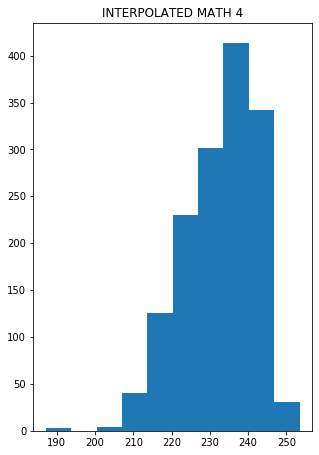

In [91]:
plt.figure(figsize=(5,7.5))
plt.hist(ed['AVG_MATH_4_SCORE'])
plt.title('INTERPOLATED MATH 4')
plt.show()

In [0]:
ed=ed0.copy()

In [0]:
ed1["GRADES_12_G"]=ed1.groupby(['YEAR'])["GRADES_12_G"].apply(lambda x: x.fillna(x.median()))

In [128]:
type(ed1.groupby(['YEAR'])["GRADES_12_G"])

pandas.core.groupby.generic.SeriesGroupBy

In [130]:
ed['AVG_MATH_4_SCORE']=ed['AVG_MATH_4_SCORE'].apply(lambda x: x.fillna(x.median()))

AttributeError: ignored

In [0]:
ed['AVG_MATH_4_SCORE']=ed['AVG_MATH_4_SCORE'].fillna(ed['AVG_MATH_4_SCORE'].median())

In [135]:
type(ed['AVG_MATH_4_SCORE'])

pandas.core.series.Series

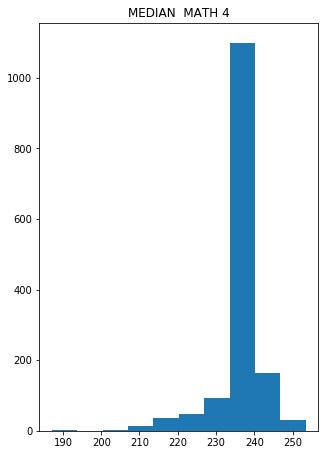

In [138]:
plt.figure(figsize=(5,7.5))
plt.hist(ed['AVG_MATH_4_SCORE'])
plt.title('MEDIAN  MATH 4')
plt.show()


/////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

BASED ON HISTOGRAMS THERE ARE OUTLIERS

LET'S EXPLORE FURTHER

Z SCORE

In [0]:
from scipy.stats import zscore

z_scores = zscore(ed2["TOTAL_REVENUE"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  3,  28,  54,  63,  92, 103, 115, 143, 154, 166, 171, 192, 194,
       200, 205, 217, 223, 227, 245, 247, 253, 258, 270, 275, 279, 296,
       298, 304, 309, 323, 332, 349, 351, 357, 362, 374, 379, 383, 400,
       402, 408, 413]),)
Number of outliers is: 42
The score threshold is: 2
The indices of the outliers:
(array([ 28,  63,  92, 115, 143, 154, 166, 194, 205, 217, 247, 258, 270,
       298, 309, 323, 351, 362, 374, 402, 413]),)
Number of outliers is: 21
The score threshold is: 3
The indices of the outliers:
(array([ 63, 115, 166, 194, 217, 247, 270, 298, 309, 323, 351, 374, 402,
       413]),)
Number of outliers is: 14
The score threshold is: 4
The indices of the outliers:
(array([166, 217, 270, 323, 374, 402]),)
Number of outliers is: 6


TUKEY'S METHOD -- also known as the Interquartile Range (IQR) method

In [0]:
# NumPy's percentile() method returns the 
# values of the given percentiles. In our case,
# we give 75 and 25 as parameters which corresponds 
# to the third and the first quartile.
q75, q25 = np.percentile(ed2["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((ed2["TOTAL_REVENUE"] > max_val) 
                      | (ed2["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 22
The score threshold is: 1.5
Number of outliers is: 19
The score threshold is: 2.0
Number of outliers is: 16
The score threshold is: 2.5
Number of outliers is: 12
The score threshold is: 3.0
Number of outliers is: 7
The score threshold is: 3.5
Number of outliers is: 4
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 0


2 - If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables,

 apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

WINSORIZATION

In [0]:
from scipy.stats.mstats import winsorize

# We apply one-way winsorization to the highest end
# of the value distribution. As we have a lot of extreme
# values, we set the values of the outliers to the 
# value of the 90th percentile. 
winsorized_views = winsorize(ed2["TOTAL_REVENUE"], (0, 0.10))
winsorized_views2 = winsorize(ed2["TOTAL_EXPENDITURE"], (0, 0.10))
winsorized_views

TypeError: ignored

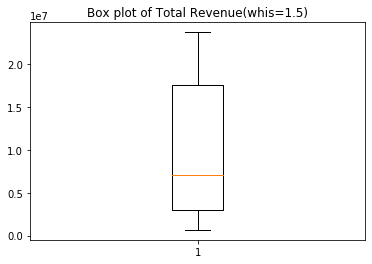

In [0]:
plt.boxplot(winsorized_views)
plt.title("Box plot of Total Revenue(whis=1.5)")
plt.show()

In [0]:
#winsorized_views2

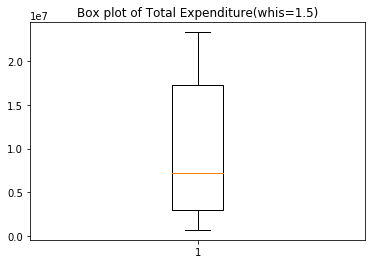

In [0]:
plt.boxplot(winsorized_views2)
plt.title("Box plot of Total Expenditure(whis=1.5)")
plt.show()

 LOG TRANSFORMATIONS

In [0]:
ed2=ed0.copy()

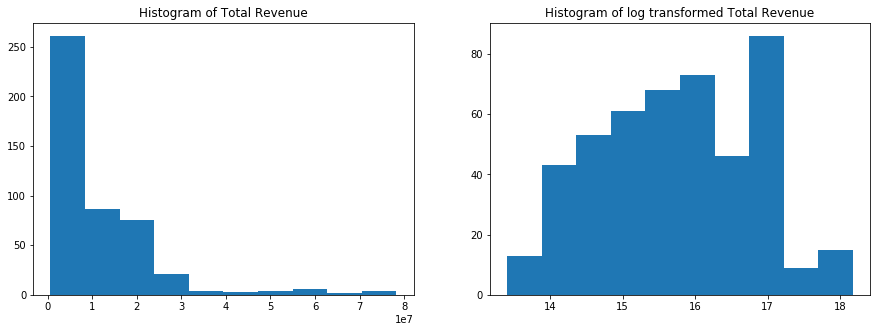

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(ed2["TOTAL_REVENUE"])
plt.title("Histogram of Total Revenue")

plt.subplot(1,2,2)
plt.hist(np.log(ed2["TOTAL_REVENUE"]))
plt.title("Histogram of log transformed Total Revenue")
plt.show()

Let's look at the box plots of the original variable and its log transformed variant to see whether log transformation has an effect on the outliers:

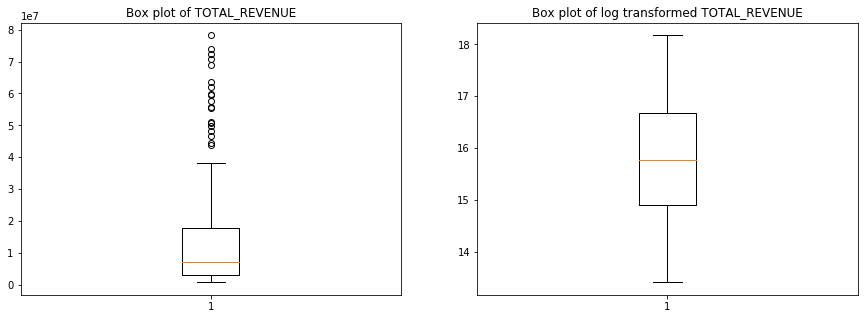

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(ed2["TOTAL_REVENUE"])
plt.title("Box plot of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.boxplot(np.log(ed2["TOTAL_REVENUE"]))
plt.title("Box plot of log transformed TOTAL_REVENUE")
plt.show()

TUKEY'S

In [0]:
q75, q25 = np.percentile(ed2["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((ed2["TOTAL_REVENUE"] > max_val) 
                      | (ed2["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 50
The score threshold is: 1.5
Number of outliers is: 40
The score threshold is: 2.0
Number of outliers is: 33
The score threshold is: 2.5
Number of outliers is: 21
The score threshold is: 3.0
Number of outliers is: 12
The score threshold is: 3.5
Number of outliers is: 6
The score threshold is: 4.0
Number of outliers is: 1
The score threshold is: 4.5
Number of outliers is: 1


NOW REPEAT FOR TOTAL EXPENDITURES

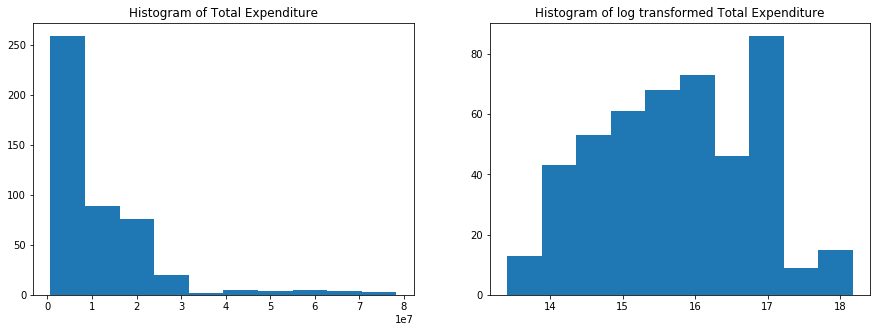

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(ed2["TOTAL_EXPENDITURE"])
plt.title("Histogram of Total Expenditure")

plt.subplot(1,2,2)
plt.hist(np.log(ed2["TOTAL_REVENUE"]))
plt.title("Histogram of log transformed Total Expenditure")
plt.show()

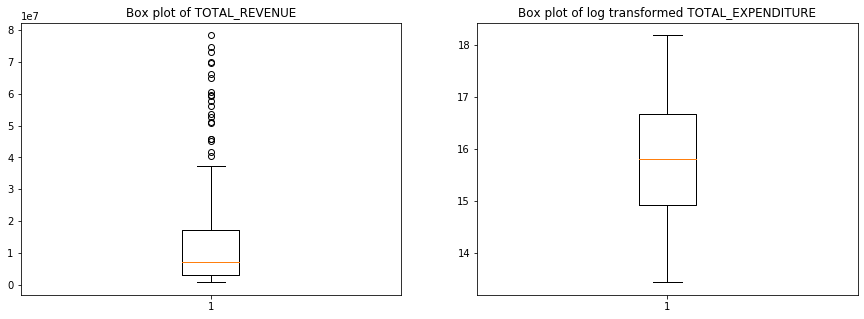

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(ed2["TOTAL_EXPENDITURE"])
plt.title("Box plot of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.boxplot(np.log(ed2["TOTAL_EXPENDITURE"]))
plt.title("Box plot of log transformed TOTAL_EXPENDITURE")
plt.show()

TUKEY'S

In [0]:
q75, q25 = np.percentile(ed2["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((ed2["TOTAL_EXPENDITURE"] > max_val) 
                      | (ed2["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 24
The score threshold is: 1.5
Number of outliers is: 21
The score threshold is: 2.0
Number of outliers is: 18
The score threshold is: 2.5
Number of outliers is: 13
The score threshold is: 3.0
Number of outliers is: 8
The score threshold is: 3.5
Number of outliers is: 5
The score threshold is: 4.0
Number of outliers is: 2
The score threshold is: 4.5
Number of outliers is: 0


In [0]:
ed2['TOTAL_EXPENDITURE'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1487    False
1488    False
1489    False
1490    False
1491    False
Name: TOTAL_EXPENDITURE, Length: 1492, dtype: bool

In [0]:
ed2['TOTAL_EXPENDITURE'].isnull().sum()

0

3- Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers).

 You can think of it as a kind of budget deficit in education.
 
  Do you find any outlier values in this new variable? 
  
  If so, eliminate them using the technique you think most suitable.

In [0]:
ed2['TOTAL_DIFF']=ed2['TOTAL_REVENUE']-ed2['TOTAL_EXPENDITURE']

In [0]:
ed2['TOTAL_DIFF'].head()

209   -207170.0
211   -248251.0
212   -113997.0
213   -278711.0
214   -183962.0
Name: TOTAL_DIFF, dtype: float64

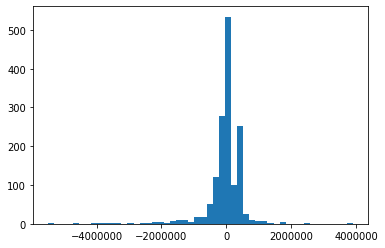

In [0]:
plt.hist(ed2['TOTAL_DIFF'],bins=50)
plt.show()

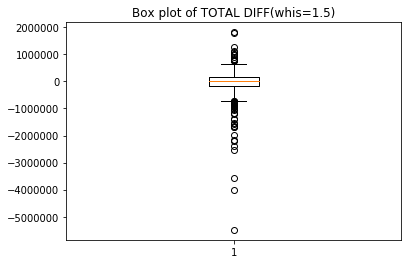

In [0]:
plt.boxplot(ed2["TOTAL_DIFF"],whis=1.5)
plt.title("Box plot of TOTAL DIFF(whis=1.5)")
plt.show()

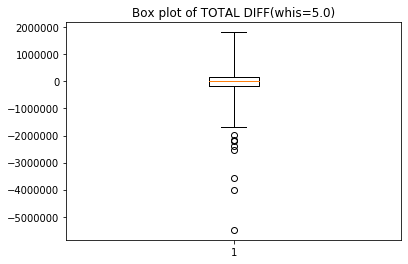

In [0]:
plt.boxplot(ed2["TOTAL_DIFF"],whis=5.0)
plt.title("Box plot of TOTAL DIFF(whis=5.0)")
plt.show()

Z SCORE

In [0]:
from scipy.stats import zscore

z_scores = zscore(ed2["TOTAL_DIFF"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([ 28, 125, 173, 184, 197, 228, 248, 270, 276, 279, 280, 288, 299,
       321, 325, 332, 333, 341, 376, 384, 390, 392, 405]),)
Number of outliers is: 23
The score threshold is: 2
The indices of the outliers:
(array([228, 392, 405]),)
Number of outliers is: 3
The score threshold is: 3
The indices of the outliers:
(array([228, 405]),)
Number of outliers is: 2
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


LOG TRANSFORMATION

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


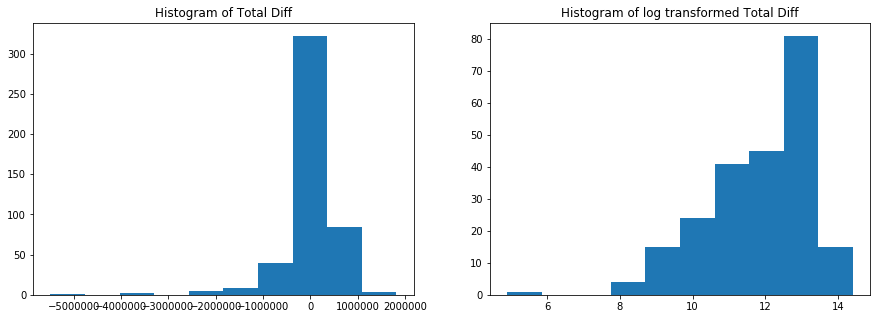

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(ed2["TOTAL_DIFF"])
plt.title("Histogram of Total Diff")

plt.subplot(1,2,2)
plt.hist(np.log(ed2["TOTAL_DIFF"]))
plt.title("Histogram of log transformed Total Diff")
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


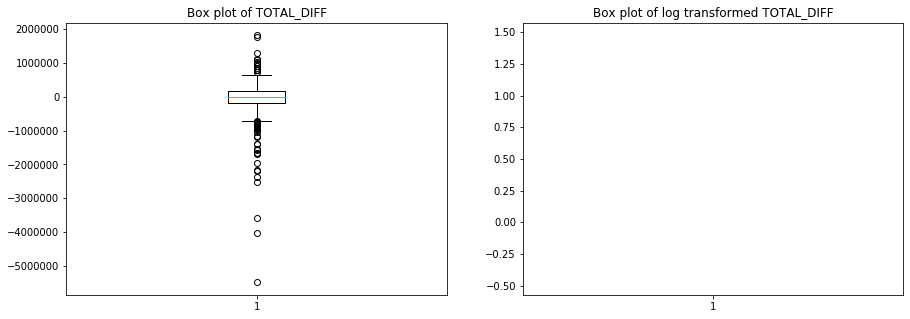

In [0]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(ed2["TOTAL_DIFF"])
plt.title("Box plot of TOTAL_DIFF")

plt.subplot(1,2,2)
plt.boxplot(np.log(ed2["TOTAL_DIFF"]))
plt.title("Box plot of log transformed TOTAL_DIFF")
plt.show()

EMOTY BOX PLOT OF LOG TRANSFORMED TOTAL DIFF MEANS LOG TRANSFORM TOOK CARE OF ALL OUTLIERS

WE CAN DOUBLE CHECK WITH Z SCORE

In [0]:
from scipy.stats import zscore

z_scores = zscore(np.log(ed2["TOTAL_DIFF"]))
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


TUKEYS WITH LOG TRANSFORM

In [0]:
# now we take the log of TOTAL_DIFF and calculate
# the quartiles accordingly.
q75, q25 = np.percentile(np.log(ed2["TOTAL_DIFF"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(ed2["TOTAL_DIFF"]) > max_val) 
                      | (np.log(ed2["TOTAL_DIFF"]) < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


SO TUKEY'S CONFIRMS THAT LOG TRANSFORM ELIMINATED OUTLIERS

4 - Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE.

 This time, use the **outlier eliminated** versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. 
 
 In this newly created variable, can you find any outliers?
 
  If so, **eliminate them.**

In [0]:
v=np.log(ed2['TOTAL_REVENUE'])-np.log(ed2['TOTAL_EXPENDITURE'])

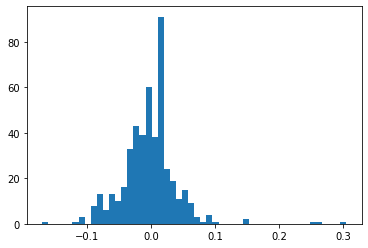

In [0]:
plt.hist(v,bins=50)
plt.show()


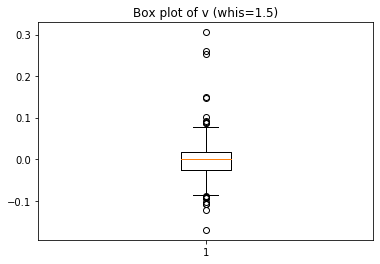

In [0]:
plt.boxplot(v,whis=1.5)
plt.title("Box plot of v (whis=1.5)")
plt.show()

MANY OUTLIERS


5 - Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions.

 Do you see any differences?

In [0]:
v.describe()

count    467.000000
mean      -0.001865
std        0.044397
min       -0.170369
25%       -0.025170
50%       -0.000375
75%        0.017574
max        0.305521
dtype: float64

In [0]:
ed2['TOTAL_DIFF'].describe()


count    4.670000e+02
mean    -5.245817e+04
std      5.888767e+05
min     -5.487742e+06
25%     -1.825965e+05
50%     -1.524000e+03
75%      1.712450e+05
max      1.816932e+06
Name: TOTAL_DIFF, dtype: float64

In [0]:
np.log(ed2['TOTAL_DIFF']).describe()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    226.000000
mean      11.835200
std        1.438688
min        4.890349
25%       10.939465
50%       12.126811
75%       12.933653
max       14.412660
Name: TOTAL_DIFF, dtype: float64

yes -- many values are different

thinkful solution used winzorization -- i used log

6- our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable:

 the method in the 3rd question or the one in the 4th question?